<a href="https://colab.research.google.com/github/AromaDsouza/BigMart_Sales_Prediction/blob/main/BigMart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



###Importing the necessary libraries




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

###Loading the data

In [2]:
train_data = pd.read_csv('https://raw.githubusercontent.com/AromaDsouza/BigMart_Sales_Prediction/main/Bigmart_Train.csv')
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data = pd.read_csv('https://raw.githubusercontent.com/AromaDsouza/BigMart_Sales_Prediction/main/Bigmart_Test.csv')
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


###Statistical Analysis

In [6]:
train_data.shape

(8523, 12)

In [7]:
test_data.shape


(5681, 11)

In [8]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
train_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
test_data.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [12]:
train_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test_data.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#Basic EDA

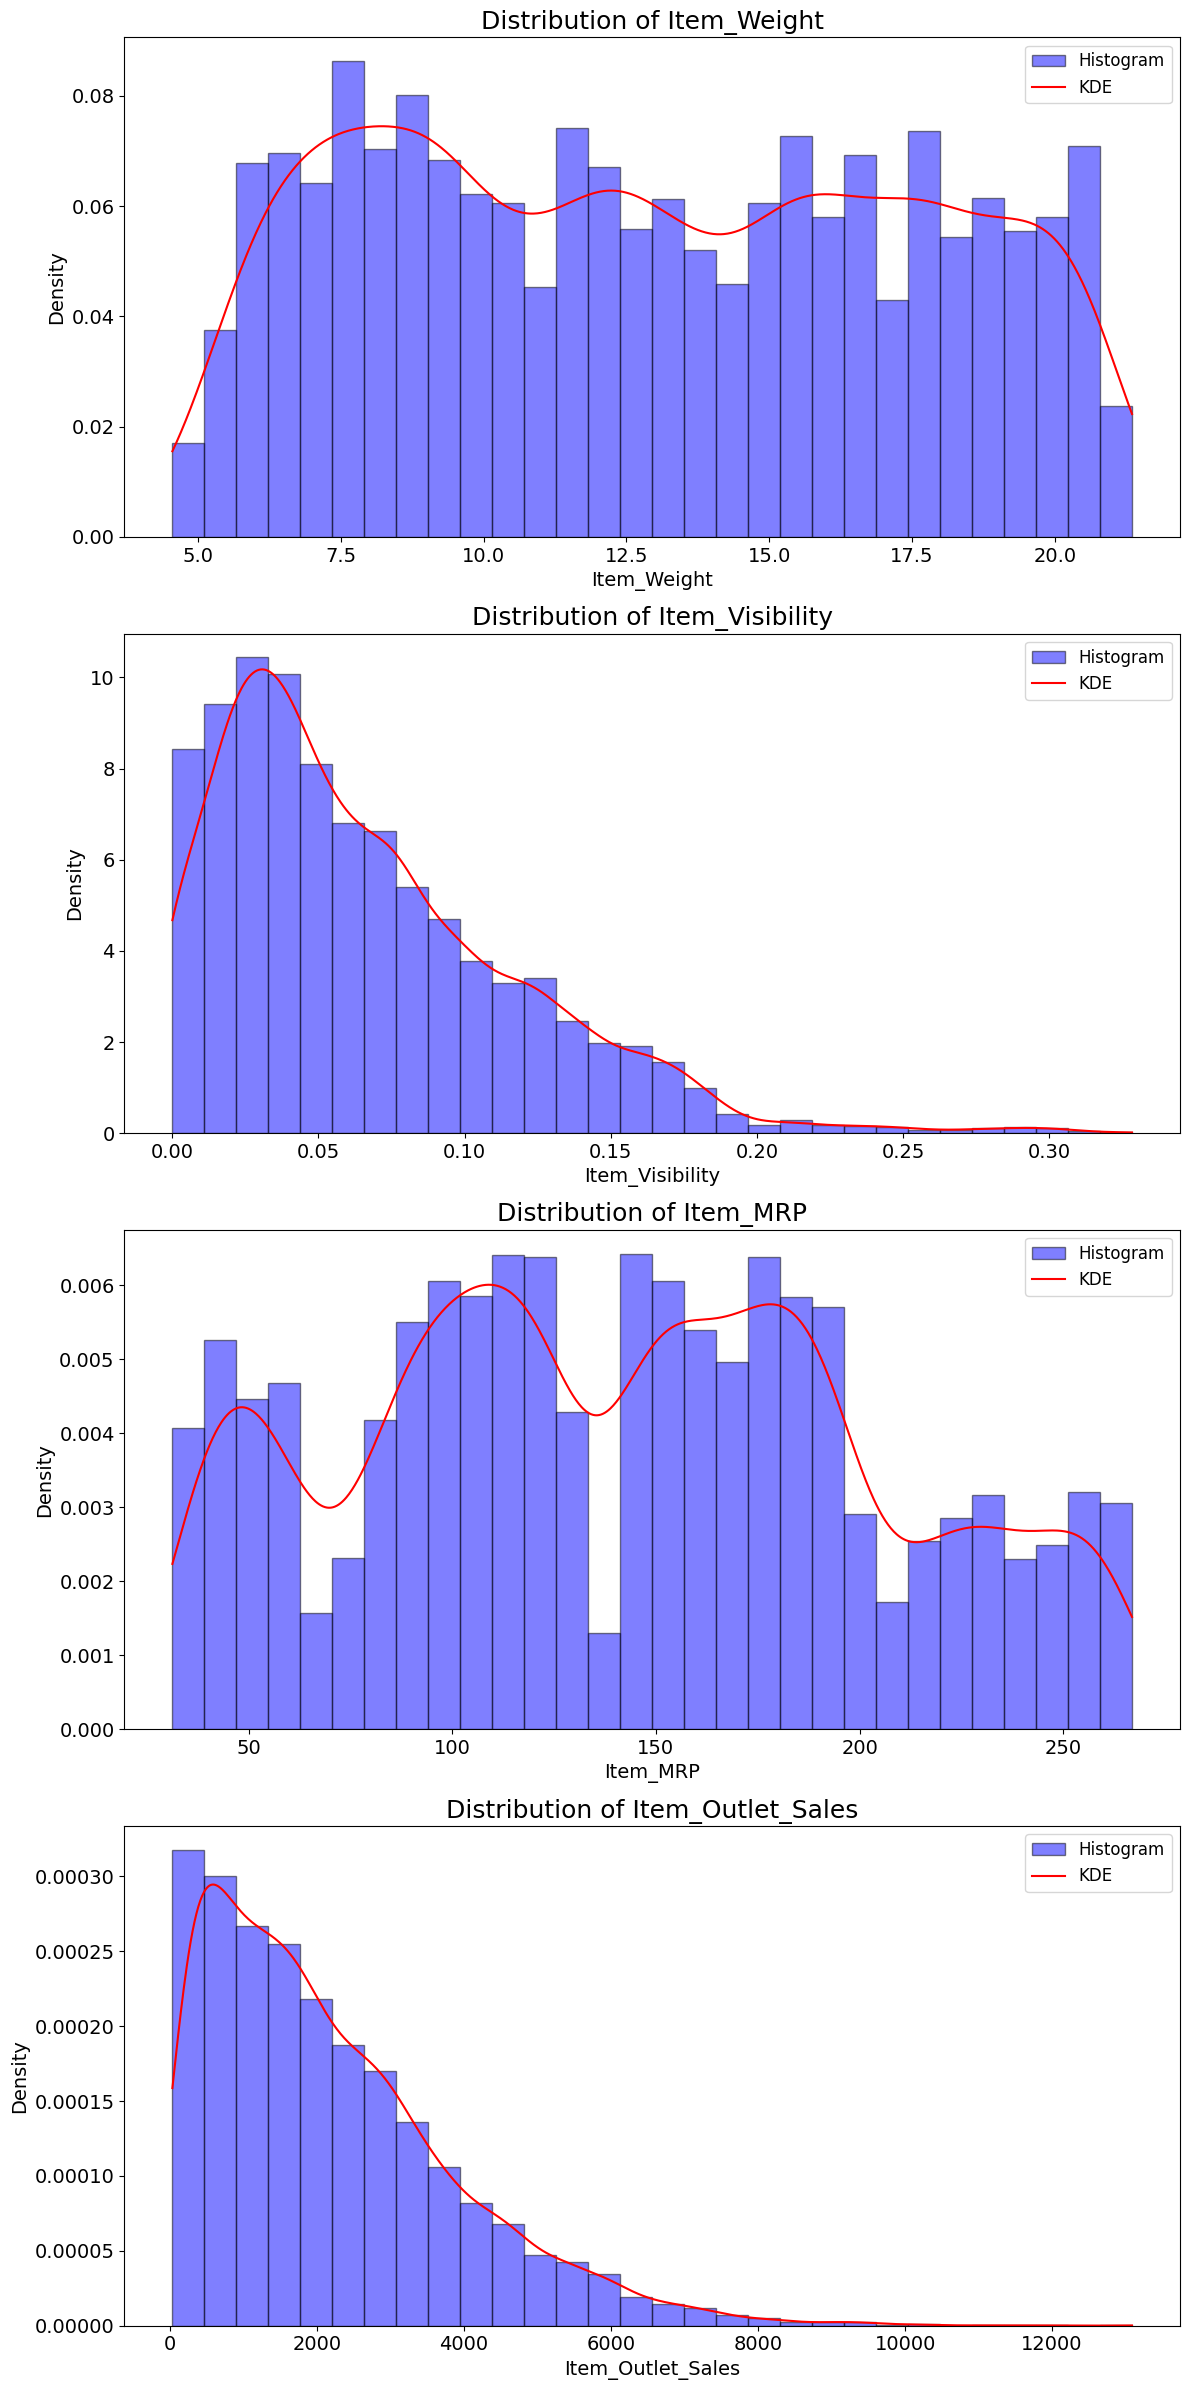

In [14]:
numerical_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales']

fig, axs = plt.subplots(len(numerical_features), 1, figsize = (12, len(numerical_features) * 6))
fig.subplots_adjust(hspace = 0.4)
axs = axs.flatten()

for i, feature in enumerate(numerical_features):
  data = train_data[feature].dropna()

  axs[i].hist(data, bins = 30, alpha = 0.5, color = 'blue', edgecolor = 'black', density = True, label = 'Histogram')
  kde = gaussian_kde(data)
  x_range = np.linspace(data.min(), data.max(), 1000)
  axs[i].plot(x_range, kde(x_range), color = 'red', label = 'KDE')

  axs[i].set_title(f'Distribution of {feature}', fontsize = 18)
  axs[i].set_xlabel(feature, fontsize = 14)
  axs[i].set_ylabel('Density', fontsize = 14)
  axs[i].legend(fontsize = 12)
  axs[i].tick_params(axis = 'x', labelsize = 14)
  axs[i].tick_params(axis = 'y', labelsize = 14)

plt.tight_layout()
plt.show()

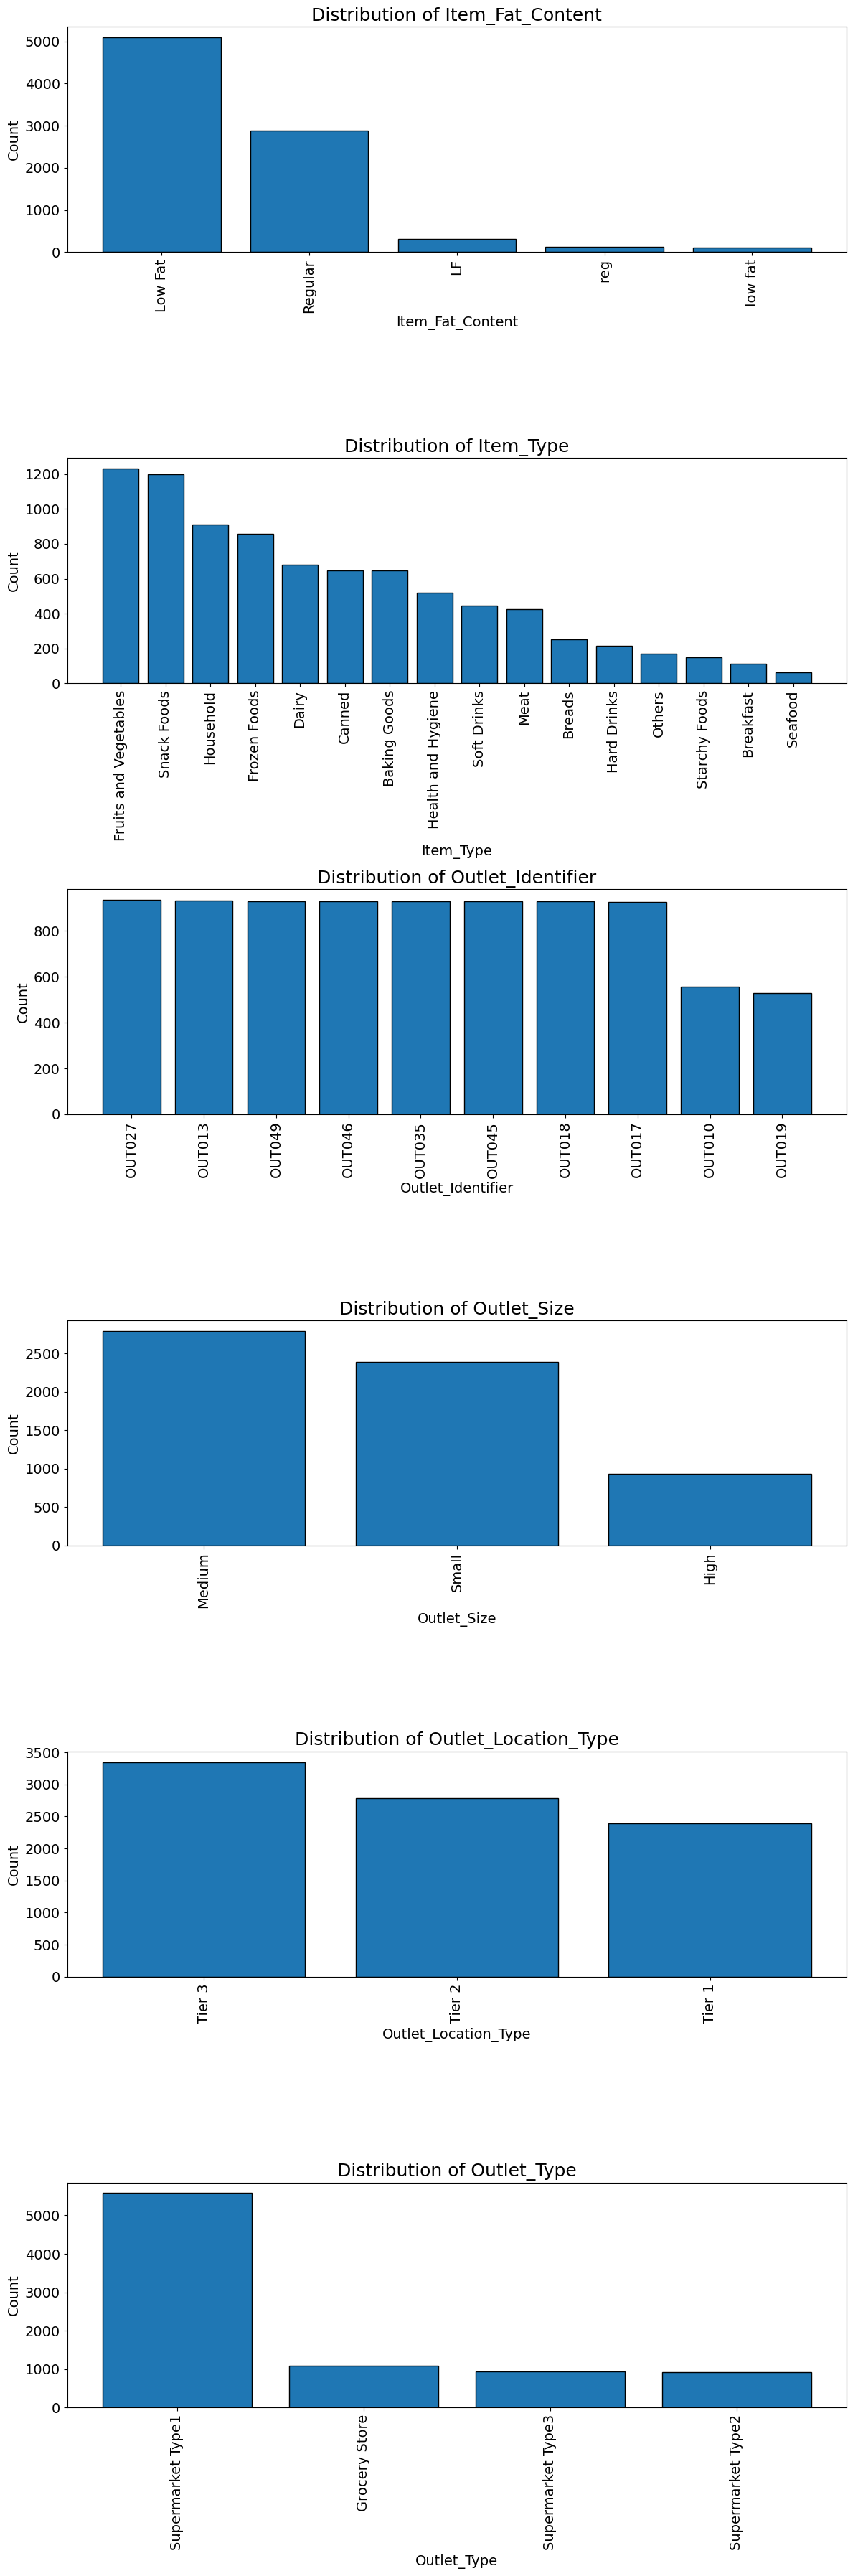

In [15]:
categorical_features = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

fig, axs = plt.subplots(len(categorical_features), 1, figsize=(12, len(categorical_features) * 6))
fig.subplots_adjust(hspace=0.4)
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    data = train_data[feature].value_counts()
    categories = data.index
    counts = data.values

    axs[i].bar(categories, counts, edgecolor = 'black')

    axs[i].set_title(f'Distribution of {feature}', fontsize=18)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel('Count', fontsize=14)
    axs[i].tick_params(axis='x', labelsize=14, rotation=90)
    axs[i].tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()



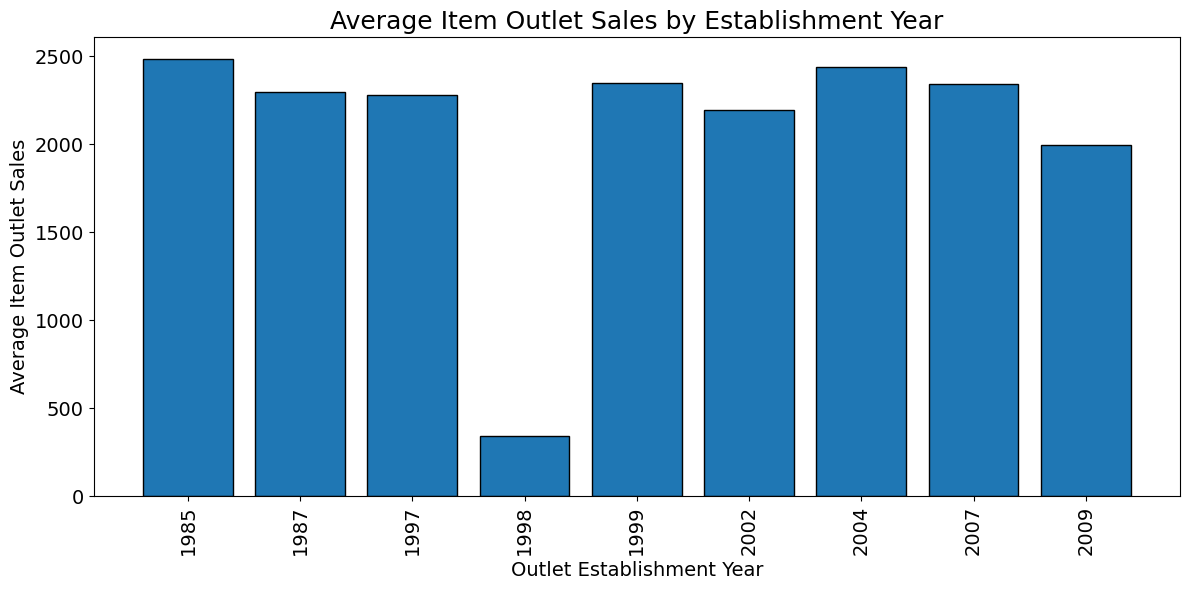

In [16]:
avg_sales_per_year = train_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean()

plt.figure(figsize=(12, 6))
plt.bar(avg_sales_per_year.index.astype(str), avg_sales_per_year.values, edgecolor = 'black')
plt.title('Average Item Outlet Sales by Establishment Year', fontsize = 18)
plt.xlabel('Outlet Establishment Year', fontsize = 14)
plt.ylabel('Average Item Outlet Sales', fontsize = 14)
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

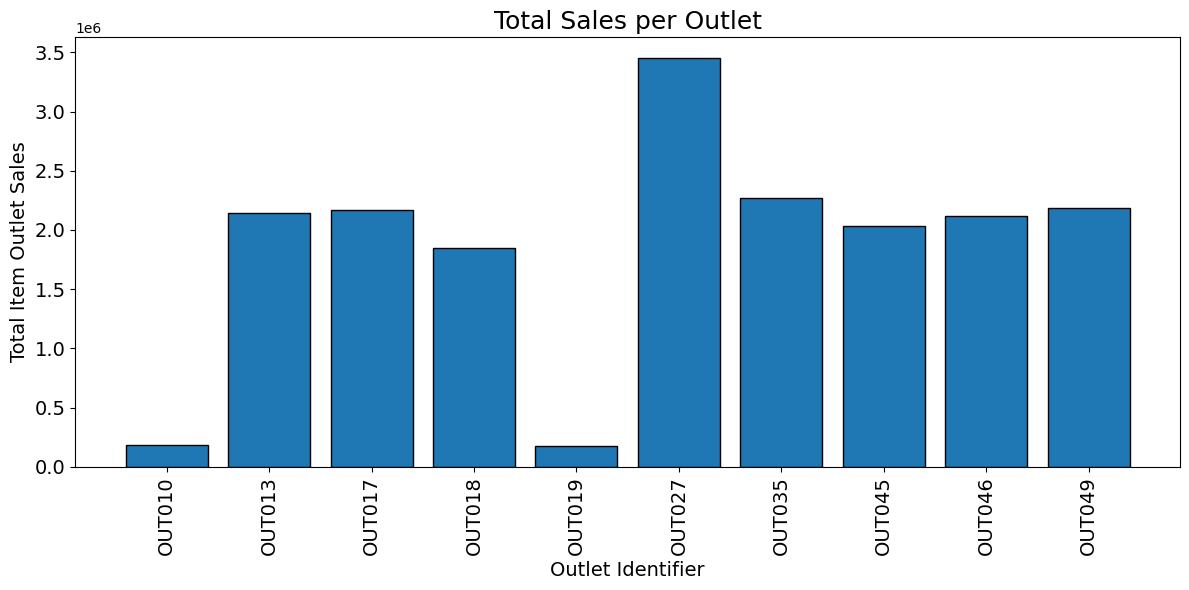

In [17]:
total_sales_per_outlet = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
plt.figure(figsize=(12, 6))

plt.bar(total_sales_per_outlet.index.astype(str), total_sales_per_outlet.values, edgecolor = 'black')
plt.title('Total Sales per Outlet', fontsize=18)
plt.xlabel('Outlet Identifier', fontsize=14)
plt.ylabel('Total Item Outlet Sales', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

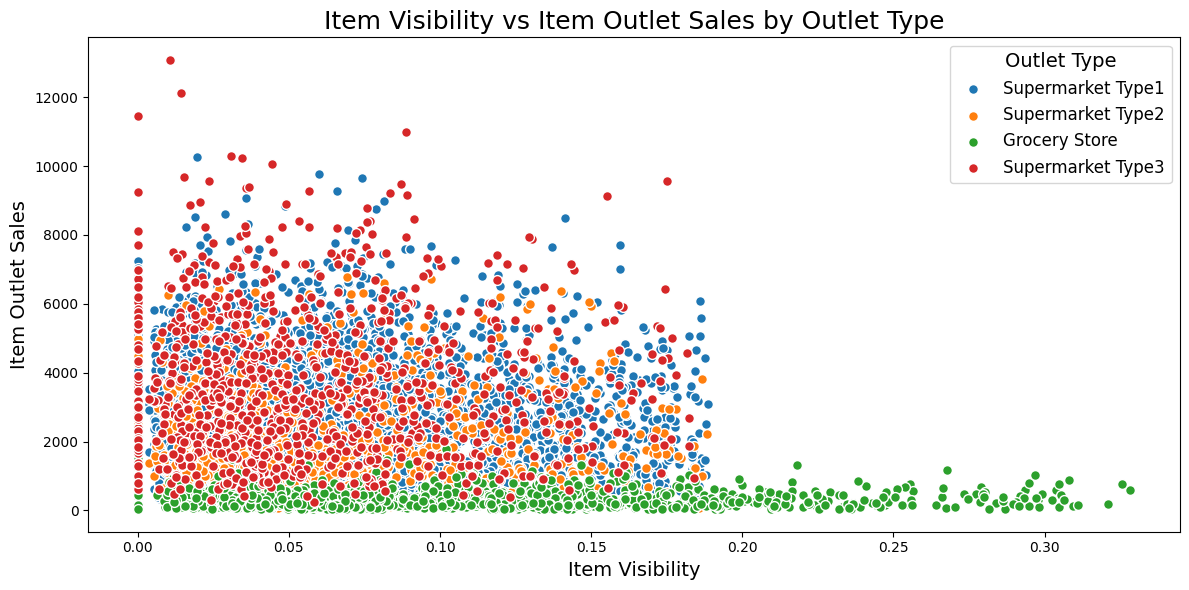

In [18]:
plt.figure(figsize=(12, 6))
for outlet_type in train_data['Outlet_Type'].unique():
    subset = train_data[train_data['Outlet_Type'] == outlet_type]
    plt.scatter(subset['Item_Visibility'], subset['Item_Outlet_Sales'], label=outlet_type, alpha = 1, edgecolor = 'white', s = 50)

plt.title('Item Visibility vs Item Outlet Sales by Outlet Type', fontsize=18)
plt.xlabel('Item Visibility', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.legend(title='Outlet Type', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

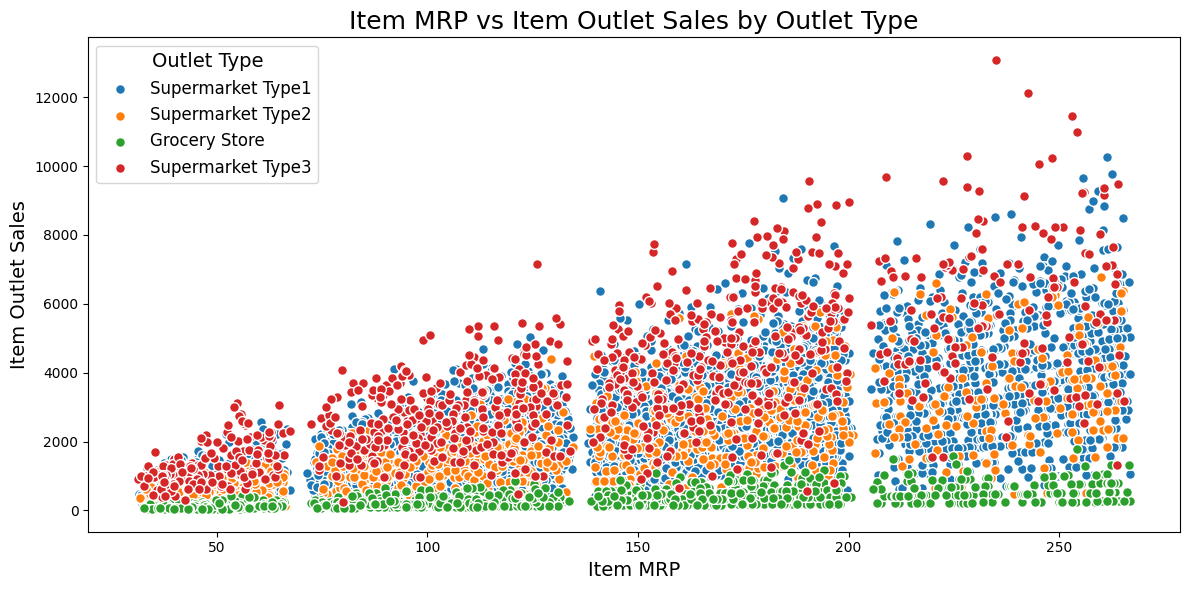

In [19]:
plt.figure(figsize=(12, 6))
for outlet_type in train_data['Outlet_Type'].unique():
    subset = train_data[train_data['Outlet_Type'] == outlet_type]
    plt.scatter(subset['Item_MRP'], subset['Item_Outlet_Sales'], label=outlet_type, alpha = 1, edgecolor = 'white', s = 50)

plt.title('Item MRP vs Item Outlet Sales by Outlet Type', fontsize=18)
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.legend(title='Outlet Type', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

###Advanced EDA

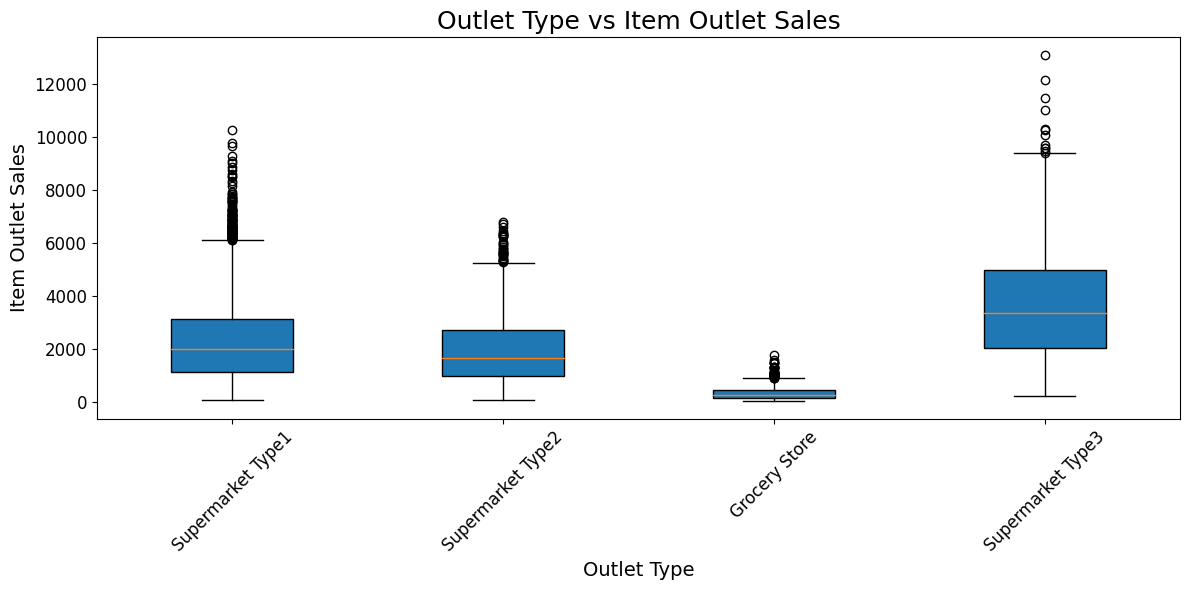

In [20]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Type'] == outlet]['Item_Outlet_Sales'] for outlet in train_data['Outlet_Type'].unique()], patch_artist=True)

plt.title('Outlet Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Type'].unique()) + 1), train_data['Outlet_Type'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

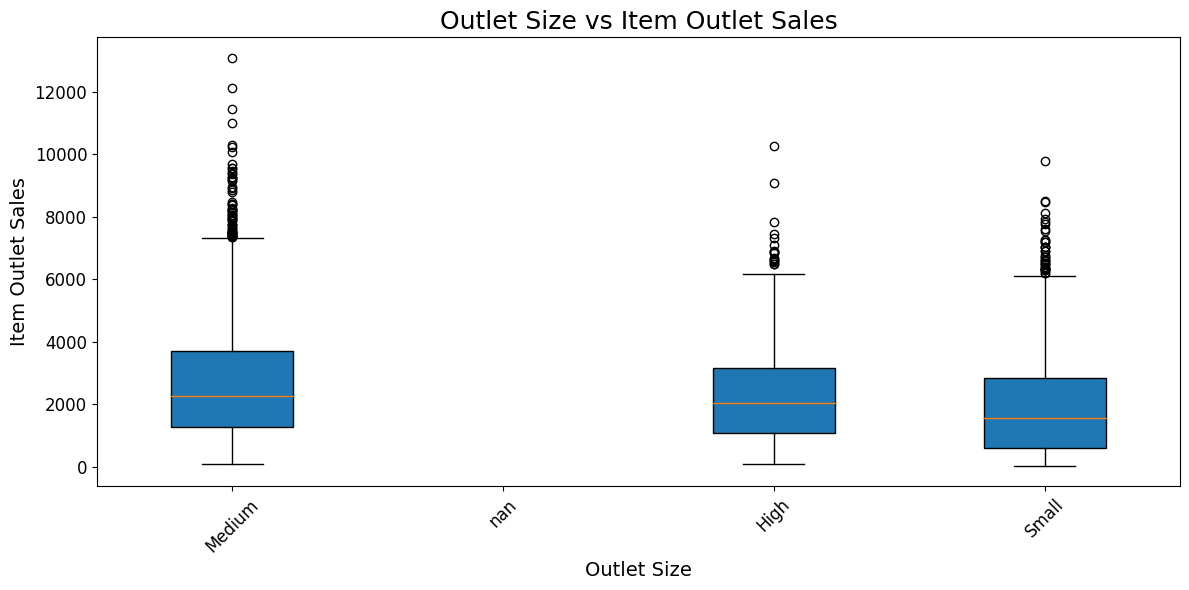

In [21]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Size'] == size]['Item_Outlet_Sales'] for size in train_data['Outlet_Size'].unique()], patch_artist=True)

plt.title('Outlet Size vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Size', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Size'].unique()) + 1), train_data['Outlet_Size'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

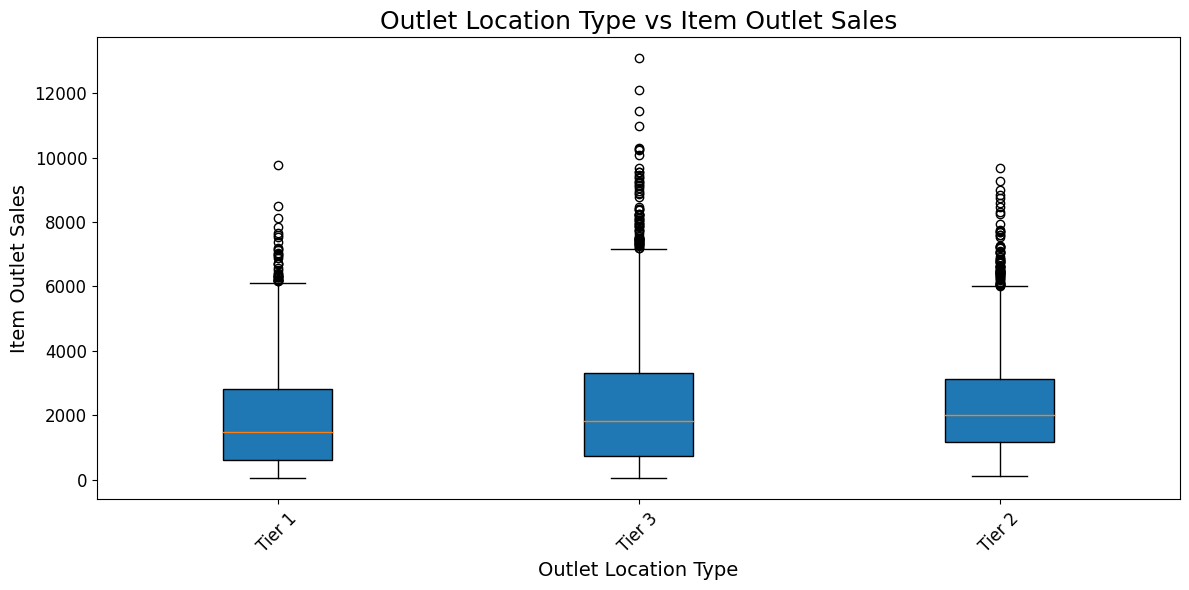

In [22]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Location_Type'] == location]['Item_Outlet_Sales'] for location in train_data['Outlet_Location_Type'].unique()], patch_artist=True)

plt.title('Outlet Location Type vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Location Type', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Location_Type'].unique()) + 1), train_data['Outlet_Location_Type'].unique(), rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

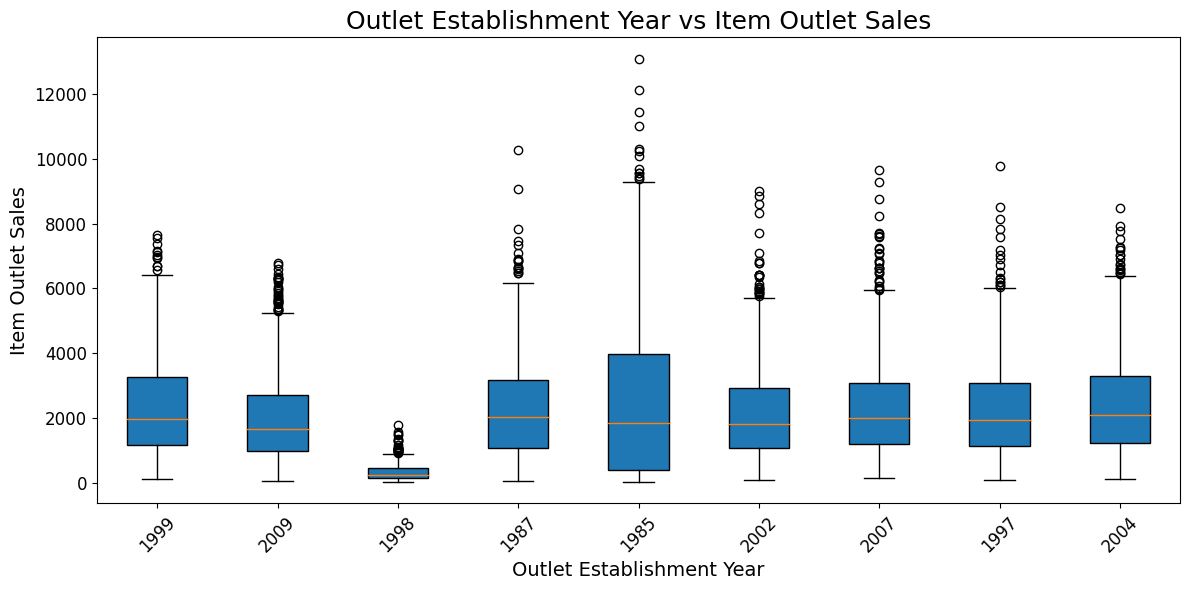

In [23]:
plt.figure(figsize=(12, 6))
plt.boxplot([train_data[train_data['Outlet_Establishment_Year'] == year]['Item_Outlet_Sales'] for year in train_data['Outlet_Establishment_Year'].unique()], patch_artist=True)

plt.title('Outlet Establishment Year vs Item Outlet Sales', fontsize=18)
plt.xlabel('Outlet Establishment Year', fontsize=14)
plt.ylabel('Item Outlet Sales', fontsize=14)

plt.xticks(range(1, len(train_data['Outlet_Establishment_Year'].unique()) + 1), train_data['Outlet_Establishment_Year'].unique(),  rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

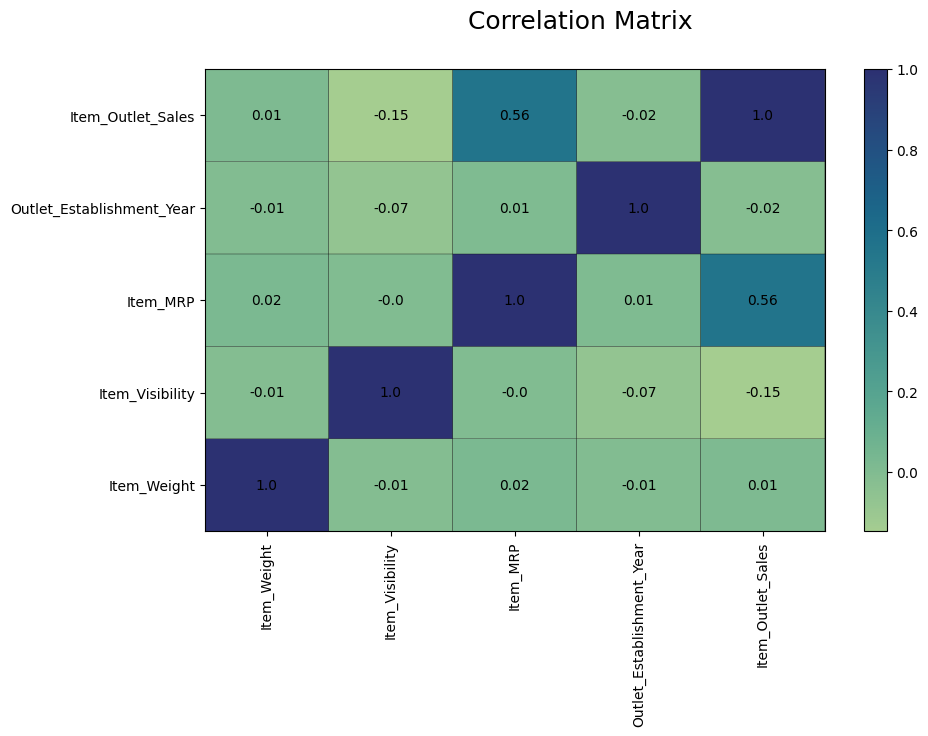

In [37]:
numeric_data = train_data.select_dtypes(include = ['float64' , 'int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize = (10,6))
plt.pcolor(correlation_matrix, cmap = 'crest', edgecolors = 'k', linewidths = 0.2)
plt.colorbar()

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, round(correlation_matrix.iloc[i, j], 2),
                 ha='center', va='center', color='black')

plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns)
plt.title('Correlation Matrix', fontsize=18)

plt.show()

###Pre-Processing

In [25]:
#Preprocessing the train data

train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [26]:
#Preprocessing the test data

test_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

In [27]:
#Verifying the null values
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [29]:
#Standardizing the Item_Fat_Content for train data
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

print("Unique Values in Item_Fat_Content after standardization: ")
print(train_data['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after standardization: 
['Low Fat' 'Regular']


In [30]:
#Standardizing the Item_Fat_Content for test data
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({
    'low fat' : 'Low Fat',
    'LF' : 'Low Fat',
    'reg' : 'Regular'
})

print("Unique Values in Item_Fat_Content after standardization: ")
print(test_data['Item_Fat_Content'].unique())

Unique Values in Item_Fat_Content after standardization: 
['Low Fat' 'Regular']


In [31]:
def cap_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q1 + 1.5 * IQR

  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df

def cap_outliers_grouped(df, column, group_by_column):
  df = df.groupby(group_by_column, group_keys=False).apply(lambda x: cap_outliers(x.copy(), column).reset_index(drop=True))
  return df

train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Type')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Size')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Establishment_Year')
train_data = cap_outliers_grouped(train_data, 'Item_Outlet_Sales', 'Outlet_Location_Type')

print("Shape of train data after capping the outliers: ", train_data.shape)

Shape of train data after capping the outliers:  (8523, 12)


In [34]:
#OneHotEncoding

columns_to_encode = ['Item_Fat_Content', 'Item_Type','Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type']
columns_to_encode = [col for col in columns_to_encode if col in train_data.columns]

train_data_encoded = pd.get_dummies(train_data, columns= columns_to_encode, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns = columns_to_encode, drop_first=True)

In [36]:
train_data_encoded.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDC37,12.857645,0.057557,107.6938,1985,214.3876,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,FDC14,12.857645,0.072222,43.6454,1985,125.8362,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,FDS02,12.857645,0.255395,196.8794,1985,611.2044,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,FDI26,12.857645,0.061082,180.0344,1985,611.2044,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,FDY40,12.857645,0.150286,51.0692,1985,147.8076,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [38]:
test_data_encoded.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0.007565,107.8622,1999,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,FDW14,8.300000,0.038428,87.3198,2007,True,False,False,False,True,...,False,False,False,True,False,True,False,True,False,False
2,NCN55,14.600000,0.099575,241.7538,1998,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,FDQ58,7.315000,0.015388,155.0340,2007,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
4,FDY38,12.857645,0.118599,234.2300,1985,True,False,False,False,True,...,False,False,False,True,False,False,True,False,False,True


###Feature Engineering

In [41]:
#Creating a new feature Units_Sold_Per_Outlet by dividing Item_Outlet_Sales by Item_MRP
train_data['Units_Sold'] = (train_data['Item_Outlet_Sales'] / train_data['Item_MRP']).round()

units_sold_per_outlet = train_data.groupby('Outlet_Identifier')['Units_Sold'].sum().reset_index()

print(units_sold_per_outlet)

  Outlet_Identifier  Units_Sold
0            OUT010      1220.0
1            OUT013     14317.0
2            OUT017     14704.0
3            OUT018     12188.0
4            OUT019      1213.0
5            OUT027     22126.0
6            OUT035     14925.0
7            OUT045     13809.0
8            OUT046     14339.0
9            OUT049     14685.0


In [42]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Units_Sold
0,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,2.0
1,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,3.0
2,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,611.2044,3.0
3,FDI26,12.857645,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,611.2044,3.0
4,FDY40,12.857645,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,3.0


###EDA after preprocessing

In [32]:
'''plt.figure(figsize = (12,6))
sns.boxplot(x = 'Outlet_Location_Type', y ='Item_Outlet_Sales', data = train_data)
plt.title = ('Outlet Location Type vs Item Outlet Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()
'''

"plt.figure(figsize = (12,6))\nsns.boxplot(x = 'Outlet_Location_Type', y ='Item_Outlet_Sales', data = train_data)\nplt.title = ('Outlet Location Type vs Item Outlet Sales')\nplt.xlabel('Outlet Location Type')\nplt.ylabel('Item Outlet Sales')\nplt.show()\n"

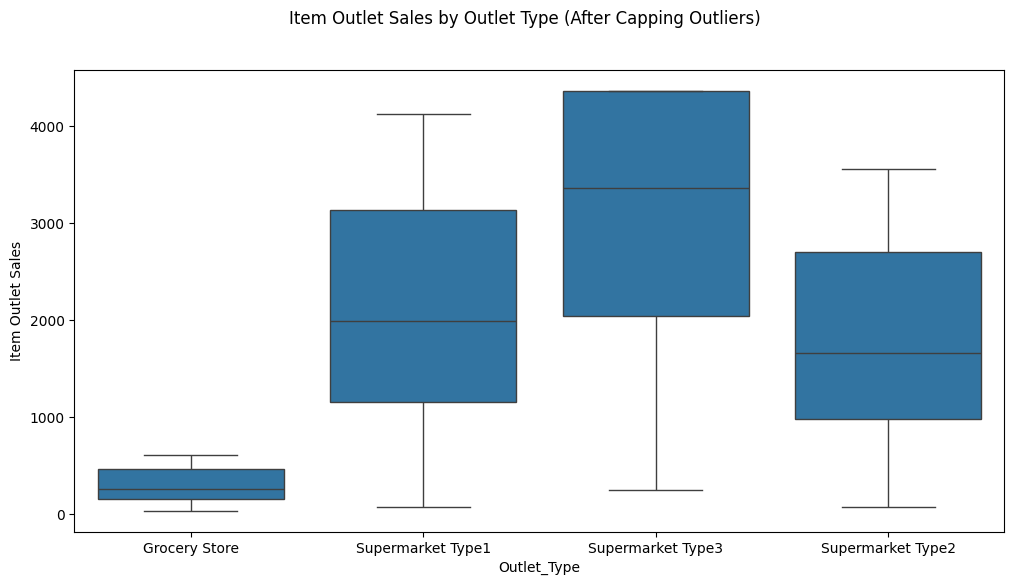

In [33]:
plt.title = plt.suptitle
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = train_data)
plt.title('Item Outlet Sales by Outlet Type (After Capping Outliers)')
plt.xlabel('Outlet_Type')
plt.ylabel('Item Outlet Sales')
plt.show()